Training loss: 1.9031716799939364
Training loss: 0.8265524603156392
Training loss: 0.5095440835269021
Training loss: 0.4213661383559455
Training loss: 0.37985614993806077


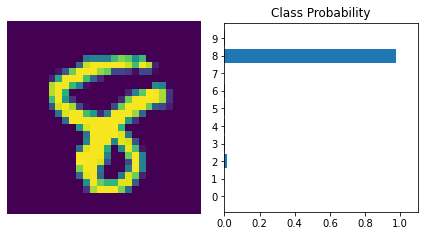

In [2]:
%matplotlib inline

#!pip install helper

import helper
import torch
from torch import nn 
import torch.nn.functional as F
from torchvision import datasets, transforms, utils


transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5), (0.5)),
                               ])

trainset = datasets.MNIST('-/.pytorch/MNIST_data/', download = True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64, shuffle = True)

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

images, labels = next(iter(trainloader))

img= images[0].view(1,784)

with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)